
<div style="display: flex; background-color: RGB(230,47,63);" >
<h1 style="margin: auto; padding: 30px; ">Etude de marché, La poule qui chante</h1>
</div>

## Partie 1 : Préparation des données. 

## Sommaire<a id='100'></a>


* [ I   : Importation des modules nécéssaire](#01) 
* [ II  : Lecture et nettoyage des données fournies.](#02) 
* [ III : Lecture et nettoyage des données trouvés.](#03) 
* [ IV  : Exportation du nouveau Dataframe](#04) 
* [ V   : Lecture et description du nouveau dataframe](#05) 


### I : Importation des modules nécéssaire<a id='01'></a>
[retourner au sommaire](#100)

In [1]:
# Modules
import numpy as np #bibliothèque de calcul numérique sous python
import datetime #bibliothèque pour manipuler des dates et des heures
import pandas as pd #bibliothèque de manipulation de données


import statistics #bibliothèque de statistiques
import scipy.stats as stats #bibliothèque de statistiques

import statsmodels.api as sm #bibliothèque de statistiques

import seaborn as sns #bibliothèque de visualisation de données
import matplotlib.pyplot as plt #bibliothèque de visualisation de données
import matplotlib.ticker as ticker #bibliothèque de visualisation de données

import pycountry #bibliothèque pour manipuler des pays
from deep_translator import GoogleTranslator #bibliothèque pour traduire des textes
from functools import reduce #bibliothèque pour manipuler des données

from rapidfuzz import fuzz #bibliothèque pour comparer des chaînes de caractères

### II : Lecture et nettoyage des données fournies.<a id='02'></a>
[retourner au sommaire](#100)

In [2]:
#Importation des données fournies
dispo_alim=pd.read_csv("DisponibiliteAlimentaire_2017.csv",delimiter=',')
population=pd.read_csv("Population_2000_2018.csv",delimiter=',')


In [3]:
dispo_alim.head(2) #aperçu de dispo_alim

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées


In [4]:
population.head(2) #aperçu de population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN


In [5]:
population.info() #informations sur population

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [6]:
note_list=population.Note.unique().tolist() #valeurs distinctes de la colonne Note

print("- Valeurs distinctes de la colonne Note : ","\n",note_list)
print("\n- Nombre de lignes ayant des données nulles dans la colonne Note : ",population['Note'].isnull().sum())

- Valeurs distinctes de la colonne Note :  
 [nan, 'UNDESA, Population Division – World Population Prospects, the 2017 Revision']

- Nombre de lignes ayant des données nulles dans la colonne Note :  4153


In [7]:
dispo_alim.info() #informations sur dispo_alim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [8]:
#Afficher les dimensions du dataset

print("Le tableau population comporte {} observations ou articles".format(population.shape[0]))#0 donne les lignes
print("Le tableau population comporte {} colonnes".format(population.shape[1]))#1 donne les colonnes
print("\nLe tableau dispo_alim comporte {} observations ou articles".format(dispo_alim.shape[0]))#0 donne les lignes
print("Le tableau dispo_alim comporte {} colonnes".format(dispo_alim.shape[1]))#1 donne les colonnes

Le tableau population comporte 4411 observations ou articles
Le tableau population comporte 15 colonnes

Le tableau dispo_alim comporte 176600 observations ou articles
Le tableau dispo_alim comporte 14 colonnes


In [9]:
colonnes_negatives = [
    col for col in population.select_dtypes(include=['int', 'float']).columns 
    if (population[col] < 0).any()
]

print("Colonnes numériques contenant des valeurs négatives dans le tableau population :", colonnes_negatives)
del colonnes_negatives

Colonnes numériques contenant des valeurs négatives dans le tableau population : []


In [10]:
colonnes_negatives = [
    col for col in dispo_alim.select_dtypes(include=['int', 'float']).columns 
    if (dispo_alim[col] < 0).any()
]

print("Colonnes numériques contenant des valeurs négatives :", colonnes_negatives)

Colonnes numériques contenant des valeurs négatives : ['Valeur']


In [11]:
nb_valeurs=dispo_alim["Valeur"].value_counts().sum()
nb_negative=np.sum((dispo_alim['Valeur'] < 0).values.ravel())

print('Nombre de valeurs dans la colonne Valeur : ',nb_valeurs)
print('Nombre de valeurs négative dans la colonne Valeur : ',nb_negative)
print('Nombre de valeurs positive dans la colonne Valeur : ',nb_valeurs-nb_negative)

Nombre de valeurs dans la colonne Valeur :  176600
Nombre de valeurs négative dans la colonne Valeur :  2544
Nombre de valeurs positive dans la colonne Valeur :  174056


In [12]:
unique_alim_code_annee = dispo_alim["Code année"].unique()
unique_alim_annee = dispo_alim["Année"].unique()

# Valeurs uniques pour popannee
unique_pop_code_annee = population["Code année"].unique()
unique_pop_annee = population["Année"].unique()

# Affichage des résultats
print("code année dans le dataframe dispo_alim : ", unique_alim_code_annee)
print("\nannées dans le dataframe dispo_alim : ", unique_alim_annee)

print("\n\ncode année dans le dataframe population :", unique_pop_code_annee)
print("\nannées dans le dataframe population : ", unique_pop_annee)

code année dans le dataframe dispo_alim :  [2017]

années dans le dataframe dispo_alim :  [2017]


code année dans le dataframe population : [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]

années dans le dataframe population :  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


Avant d'importer d'autres données, nous allons déjà  définir des indicateurs en nous aidant de l'analyse PESTEL.

Le modèle PESTEL, est un outil d’analyse stratégique qui vous permet d’identifier les facteurs externes (opportunités et menaces) qui peuvent avoir un impact, positif ou négatif, sur votre entreprise. Il fournit un point de vue global sur l’environnement de votre entreprise.

Nous avons besoin de minimum 8 variables qui aiderons a selectionner les pays (et pourquoi pas dans un ordre de préférence) a favoriser lors d'une expansion à l'international.


Les différents facteur à étudier dans notre cas sont :

(P) Les facteurs politiques :
- La stabilité du système et les orientation du pouvoir en place. Donc savoir si le pays en question est enclin à faire des affaire avec le notre ou avec des entreprises étrangère en général, les droits de douane par exemple.

(E) Les facteur économiques :
- Ce sont sans doutes les facteurs les plus important, savoir si les consommateur peuvent s'offrir nos produits (pouvoir d'achat, taux de chômage), si ça va continuer (croissance), la stabilité, l'inflation, les taux d'intérets.

(S) les facteurs sociologiques :
- Celas comprends la démographie, la distribution des revenus dans notre cas.

(T) Les facteurs technologiques :
- celas conprends le niveau d'innovation, l'accès aux nouvelles technologies et l'évolution des canaux de communication et de distribution. Ce dernoer les point qui nous intéresse afin de pouvoir distribuer nos produits nos devons faire des opérations commerciales et avoir a disposition les supports pour pouvoir les presenter.

(E) Les facteurs environmentaux :
- Savoir quesl qont les moyens légaux d'emballer et conserver les produits. savoir si les déchets générés seront traités. En effet si nos produits sont distribué dans un pays ou les déchets sont juste jetés dans la nature, avoir notre enseigne imprimé dessus pourrais aovir un effet dévastateur sur l'image de l'entreprise.

(L) Les facteurs légaux :
- Savoir si la législation nous est favorable. Le droit à la concurrence, droit des affaires semblent primordiaux.

### III : Lecture et nettoyage des données trouvés.<a id='03'></a>
[retourner au sommaire](#100)

In [13]:
# présentation des variables :
tableau = {'variable':['importation_k/tons','pop_par_1k','nb_etablissements','production_k/tons','Distance (km)','pib_million_usd','Political_Stability','indice_idi'],
           'description':["voir la dépendence envers l'import","nombre d'habitants",'nombre de kfc par pays',"taux de production de volaille",'distance par rapport à la france',
                          'PIB','indice de stabilité politique',"indice d'accès aux technologies"],
           'interet' :["savoir si le pays est autonome",'potentiel de distribution','avoir un éventuel partenaire commencial',"Indépendance à l'importation",
                       'cout du transport/conservation','indicateur de santé économique',
                       "mesurer le risque de changement de règles et lois",'pouvoir être en mesure de communiquer sur les produits mis à disposition sur le territoire'],
           'dataframe' : ["dispo_alim",'population','kfc','dispo_alim','dist','eco','PoliticalStability','idi_rank_2017']}

df_tableau=pd.DataFrame(tableau)

df_tableau

,variable,description,interet,dataframe
0,importation_k/tons,voir la dépendence envers l'import,savoir si le pays est autonome,dispo_alim
1,pop_par_1k,nombre d'habitants,potentiel de distribution,population
2,nb_etablissements,nombre de kfc par pays,avoir un éventuel partenaire commencial,kfc
3,production_k/tons,taux de production de volaille,Indépendance à l'importation,dispo_alim
4,Distance (km),distance par rapport à la france,cout du transport/conservation,dist
5,pib_million_usd,PIB,indicateur de santé économique,eco
6,Political_Stability,indice de stabilité politique,mesurer le risque de changement de règles et lois,PoliticalStability
7,indice_idi,indice d'accès aux technologies,pouvoir être en mesure de communiquer sur les ...,idi_rank_2017


- Les dataframes population et dispo_alim on été mis à disposition.

- Le dataframe kfc à été trouvé sur : https://www.caribbeansignal.com/2019/11/28/countries-with-the-largest-number-of-kfc-restaurants-per-100000-people-by-country/
- Le dataframe dist à été trouvé sur : https://www.freemaptools.com/how-far-is-it-between.htm
- Le dataframe eco à été généré sur le site de la FAO.
- Le dataframe stabilité_pol était déjà en ma possession et utilisé lors d'une autre étude.
- Le dataframe idi_rank_2017 est un indice d'accès aux technologies d'information et de communication par l'ITU https://www.itu.int/en/Pages/default.aspx


Gardons en têtes que les données étudié seront centré sur l'année 2017 et que la devise utilisé sera le dollar américain.

In [14]:
#importation des nouveaux dataframe
kfc=pd.read_csv("kfc_pays.csv",sep=';')
dist=pd.read_csv("Distance.csv",sep=';')
pol=pd.read_csv("PoliticalStability.csv",delimiter=',')
idi=pd.read_csv("idi_rank_2017.csv",delimiter=';')
eco=pd.read_csv("eco.csv",delimiter=',')


In [15]:
#Political_Stability
pol = pol[pol['Year'] == 2017].copy()
pol.drop(['Year','Granularity'],axis=1,inplace=True)
pol_final = pol.rename(columns={'Country': 'pays', 'Political_stability': 'stabilite_pol'})
pol_final['pays'] = pol_final['pays'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x)) #traduction des pays en français
pol_final.head(2)

,pays,Political_Stability
16,Afghanistan,-2.80
34,Albanie,0.38


In [16]:
#pop_par_1k
collist=["Zone","Valeur"]
population=population[population['Année']==2017]
population=population[collist].copy()
pop_final = population.rename(columns={'Zone': 'pays', 'Valeur': 'pop_par_1k'})
del collist
pop_final.head(2)


,pays,pop_par_1k
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756


In [17]:
# Distance (km)
# https://www.freemaptools.com/how-far-is-it-between.htm
dist_final = dist.rename(columns={'Country': 'pays', 'Distance(km)': 'dist(km)'})
dist_final.head(2)

,pays,Distance (km)
0,Afghanistan,"5583,53"
1,Afrique du Sud,"9063,96"


In [18]:
# nb_etablissements
# https://www.caribbeansignal.com/2019/11/28/countries-with-the-largest-number-of-kfc-restaurants-per-100000-people-by-country/

kfc.head(2)
kfc_final = kfc.rename(columns={'Country': 'pays', '# of KFC Stores': 'nb_etablissements'})
kfc_final.head(2)

,pays,nb_etablissements
0,Albanie,2
1,Angola,9


In [19]:
# pib_million_usd
collist=["Zone","Valeur"]
eco=eco[eco['Année']==2017]
eco=eco[eco['Élément']=="Valeur US $"]
eco=eco[eco['Produit']=="Produit Intérieur Brut"]
eco=eco[collist].copy()
eco_final=eco.rename(columns={'Zone':"pays",'Valeur':'pib_million_usd'})
del collist
eco_final.head(2)

,pays,pib_million_usd
68,Afghanistan,19034.302820
220,Afrique du Sud,380851.444101


In [20]:
# indice_idi
# https://www.itu.int/en/Pages/default.aspx
idi=idi.sort_values('Economy')
collist=["Economy","IDI 2017 Value"]
idi=idi[collist].copy()
idi_final = idi.rename(columns={'Economy': 'pays', 'IDI 2017 Value': 'indice_idi'})
idi_final['pays'] = idi_final['pays'].apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x)) #traduction des pays en français
del collist
idi_final.head(2)

,pays,indice_idi
158,Afghanistan,1.95
88,Albanie,5.14


In [21]:
# pour importation_k/tons et production_k/tons on doit garder les colonnes provenance et valeur en kilo tonnes (filtré sur l'année 2017)
# Et ensuite filtrer les valeurs correspondante ) l'importation et l'exportation pour les transformer en 2 nouvelles colonnes.
dispo_alim_modif=dispo_alim
collist=["Zone","Élément","Valeur"]
dispo_alim_modif=dispo_alim_modif[dispo_alim_modif['Année']==2017]
dispo_alim_modif=dispo_alim_modif[dispo_alim_modif['Produit']=="Viande de Volailles"]
dispo_alim_modif=dispo_alim_modif.query('Élément==["Production","Importations - Quantité"]')
dispo_alim_modif=dispo_alim_modif[collist]
dispo_alim_modif = dispo_alim_modif.rename(columns={'Zone': 'pays', 'Élément': 'provenance','Valeur':'valeur_1k_tons'})

del collist
dispo_alim_modif.head(2)

,pays,provenance,valeur_1k_tons
651,Afghanistan,Production,28.0
652,Afghanistan,Importations - Quantité,29.0


In [22]:
# importation_k/tons & production_k/tons
dispo_alim_final = dispo_alim_modif.pivot(index="pays", columns="provenance", values="valeur_1k_tons").reset_index()
dispo_alim_final.columns.name = None
dispo_alim_final = dispo_alim_final.rename(columns={"Importations - Quantité": "importation_k/tons","Production":"production_k/tons"})
dispo_alim_final.head(2)

,pays,importation_k/tons,production_k/tons
0,Afghanistan,29.0,28.0
1,Afrique du Sud,514.0,1667.0


In [23]:
# Création du nouveau dataframe.
dfs = [pol_final, idi_final, dispo_alim_final, kfc_final,eco_final,dist_final,pop_final]


df = reduce(lambda  left,right: pd.merge(left,right,on=['pays'],
                                            how='outer'), dfs)

In [24]:
df

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
0,Afghanistan,-2.80,1.95,29.0,28.0,NaN,1.903430e+04,"5583,53",36296.113
1,Afrique du Sud,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,"9063,96",57009.756
2,Albanie,0.38,5.14,38.0,13.0,2.0,1.301973e+04,"1635,82",2884.169
3,Algérie,-0.92,4.67,2.0,275.0,NaN,1.700970e+05,"2316,02",41389.189
4,Allemagne,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,"632,77",82658.409
...,...,...,...,...,...,...,...,...,...
286,Îles Salomon,0.20,2.11,6.0,0.0,NaN,1.469790e+03,"15050,85",636.039
287,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,1.022365e+03,NaN,37.115
288,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.751
289,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,1.309700e+03,NaN,29.577


In [25]:
df.info() #informations sur df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pays                 291 non-null    object 
 1   Political_Stability  198 non-null    float64
 2   indice_idi           176 non-null    float64
 3   importation_k/tons   170 non-null    float64
 4   production_k/tons    168 non-null    float64
 5   nb_etablissements    136 non-null    float64
 6   pib_million_usd      211 non-null    float64
 7   Distance (km)        173 non-null    object 
 8   pop_par_1k           236 non-null    float64
dtypes: float64(7), object(2)
memory usage: 20.6+ KB


In [26]:
df.isna().sum() #nombre de valeurs manquantes par colonne

pays                     0
Political_Stability     93
indice_idi             115
importation_k/tons     121
production_k/tons      123
nb_etablissements      155
pib_million_usd         80
Distance (km)          118
pop_par_1k              55
dtype: int64

In [27]:
colonnes_negatives = [
    col for col in df.select_dtypes(include=['int', 'float']).columns 
    if (df[col] < 0).any()
]

print("Colonnes numériques contenant des valeurs négatives dans df :", colonnes_negatives)
del colonnes_negatives

Colonnes numériques contenant des valeurs négatives dans df : ['Political_Stability']


Du au fait que les dataframes proviennent de divers sources, les dénominations de certains pays sont différentes. il faut filtrer et fusionner ces lignes.

In [28]:
def find_similar_pairs(df, column, threshold=80):
    similar_pairs = []
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            score = fuzz.ratio(df[column].iloc[i], df[column].iloc[j])
            if score >= threshold:  
                similar_pairs.append((i, j, score))
    return similar_pairs

# Appliquer sur la colonne 'pays'
similarities = find_similar_pairs(df, 'pays', threshold=80)

# Afficher les résultats
print("Paires similaires :")
for i, j, score in similarities:
    print(f"{df['pays'].iloc[i]} ({i}) <-> {df['pays'].iloc[j]} ({j}) : {score}")

Paires similaires :
Arabie Saoudite (11) <-> Arabie saoudite (12) : 93.33333333333333
Belize (25) <-> Bélize (42) : 83.33333333333334
Chine - RAS de Hong-Kong (52) <-> Chine, RAS de Hong Kong (55) : 89.36170212765957
Chine - RAS de Macao (53) <-> Chine, RAS de Macao (56) : 92.3076923076923
Chine continentale (54) <-> Chine, continentale (58) : 97.2972972972973
Egypte (74) <-> Égypte (271) : 83.33333333333334
El Salvador (75) <-> Le Salvador (129) : 81.81818181818181
Ethiopie (79) <-> Éthiopie (277) : 87.5
Gambie (85) <-> Zambie (268) : 83.33333333333334
Georgie (86) <-> Géorgie (101) : 85.71428571428572
Guyana (98) <-> Guyane (99) : 83.33333333333334
Irlande (114) <-> Islande (115) : 85.71428571428572
Koweit (126) <-> Koweït (127) : 83.33333333333334
Malawi (142) <-> Mali (144) : 80.0
Niger (163) <-> Nigeria (164) : 83.33333333333334
Nigeria (164) <-> Nigéria (165) : 85.71428571428572
Porto Rico (185) <-> Puerto Rico (187) : 85.71428571428572
République Dominicaine (194) <-> République

Cependant il fait tout de même vérifier. certain pays n'ont pas été filtrés et d'autres on été faussement sélectionnés.
exemple : 

Niger et Nigeria on été sélectionnés alors que ce sont deux pays différent
Loas et république Démocratique Populaire Lao n'a pas été filtré alors que c'est le même pays.

Essai sur le Nigéria ecrit avec et sans accent

In [29]:
df.iloc[164]

pays                   Nigeria
Political_Stability       -2.0
indice_idi                 2.6
importation_k/tons         NaN
production_k/tons          NaN
nb_etablissements          NaN
pib_million_usd            NaN
Distance (km)              NaN
pop_par_1k                 NaN
Name: 164, dtype: object

In [30]:
df.iloc[165]

pays                         Nigéria
Political_Stability              NaN
indice_idi                       NaN
importation_k/tons               0.0
production_k/tons              201.0
nb_etablissements               21.0
pib_million_usd        375744.658045
Distance (km)                4396,54
pop_par_1k                190873.244
Name: 165, dtype: object

In [31]:
df.loc[164] = df.loc[165].combine_first(df.loc[164])

In [32]:
df.iloc[164]

pays                         Nigéria
Political_Stability             -2.0
indice_idi                       2.6
importation_k/tons               0.0
production_k/tons              201.0
nb_etablissements               21.0
pib_million_usd        375744.658045
Distance (km)                4396,54
pop_par_1k                190873.244
Name: 164, dtype: object

In [33]:
# application du processus sur toutes les paires sélectionnées.
index_pairs = [
    (11, 12), (42, 25), (52, 55), (53, 56), (54, 58),
    (74, 271), (75, 129), (79, 277), (86, 101), (98, 99),
    (127, 126), (185, 187), (194, 200), (198, 199), (207, 221),
    (215, 216), (225, 226), (228, 227), (230, 231), (264, 265), (270, 276),
    (20,21),(30,31),(32,33),(57,59),(51,54),(98,100),(52,104),(110,111),(110,112),(53,138),
    (180,181),(191,192),(65,197),(153,198),(128,202),(64,203),(245,204),(243,205),(240,195),
    (262,263),(270,275)
]


for idx1, idx2 in index_pairs:
    df.loc[idx1] = df.loc[idx2].combine_first(df.loc[idx1])


df = df.drop(index=[165, 12, 25, 55, 56, 58, 271, 129, 277, 101, 99, 126, 187, 200, 199, 221, 216, 226, 227, 231, 265, 276,21,31,33,59,54,100,104,111,112,138,181,192,
                    197,198,202,203,204,205,195,263,275])


In [34]:
df.info() #informations sur df

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 290
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pays                 248 non-null    object 
 1   Political_Stability  198 non-null    float64
 2   indice_idi           176 non-null    float64
 3   importation_k/tons   170 non-null    float64
 4   production_k/tons    168 non-null    float64
 5   nb_etablissements    136 non-null    float64
 6   pib_million_usd      210 non-null    float64
 7   Distance (km)        173 non-null    object 
 8   pop_par_1k           235 non-null    float64
dtypes: float64(7), object(2)
memory usage: 19.4+ KB


In [35]:
num_col = df.shape[1] #nombre de colonnes dans df

df_filtre = df.dropna(thresh=(num_col // 2 + 1)) #filtrer les lignes ayant au moins la moitié des valeurs non manquantes


df_filtre.info() #informations sur df_filtre

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 286
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pays                 189 non-null    object 
 1   Political_Stability  181 non-null    float64
 2   indice_idi           170 non-null    float64
 3   importation_k/tons   170 non-null    float64
 4   production_k/tons    168 non-null    float64
 5   nb_etablissements    123 non-null    float64
 6   pib_million_usd      188 non-null    float64
 7   Distance (km)        173 non-null    object 
 8   pop_par_1k           189 non-null    float64
dtypes: float64(7), object(2)
memory usage: 14.8+ KB


In [36]:
df_final=df_filtre.copy() 
df_final['Distance (km)'] = df_final['Distance (km)'].astype(str).str.replace(',', '.').astype(float) #remplacer les virgules par des points et convertir en float


### IV : Exportation du nouveau Dataframe<a id='04'></a>
[retourner au sommaire](#100)


In [37]:
#enregister le dataframe

#df_final.to_csv('df_final.csv', index=False)

### V : Lecture et description du nouveau dataframe<a id='05'></a>
[retourner au sommaire](#100)

In [38]:
df_final.duplicated().sum() #nombre de lignes dupliquées

np.int64(0)

In [58]:
# Affiche le nombre de pays
print(f"Nombre de pays dans le jeu de données : {df_final['pays'].nunique()}")

# Affiche le nombre d'indicateurs
print(f'Nombre d\'indicateurs : {(len(df_final.columns)-1)}')

Nombre de pays dans le jeu de données : 189
Nombre d'indicateurs : 8


In [83]:
dfdrop=df_final.dropna() #On les valeurs manquantes
dfdrop.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
1,Afrique du Sud,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,9063.96,57009.756
2,Albanie,0.38,5.14,38.0,13.0,2.0,1.301973e+04,1635.82,2884.169
4,Allemagne,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409
7,Angola,-0.33,1.94,277.0,42.0,9.0,1.221239e+05,6849.73,29816.766
9,Antigua-et-Barbuda,0.75,5.71,7.0,0.0,2.0,1.467956e+03,6706.51,95.426


In [84]:
dfdrop.describe().T.style.format('{:.2f}') #statistiques descriptives

,count,mean,std,min,25%,50%,75%,max
Political_Stability,109.00,0.07,0.83,-2.41,-0.50,0.13,0.78,1.59
indice_idi,109.00,5.75,1.87,1.74,4.51,5.98,7.19,8.98
importation_k/tons,109.00,114.75,216.16,0.00,7.00,25.00,116.00,1069.00
production_k/tons,109.00,1028.62,3051.99,0.00,35.00,136.00,918.00,21914.00
nb_etablissements,109.00,202.53,718.05,1.00,6.00,21.00,83.00,6078.00
pib_million_usd,109.00,679293.17,2288894.97,520.70,23136.25,82035.79,341271.10,19612100.00
Distance (km),109.00,5841.02,3641.24,424.91,1945.82,6820.13,8588.61,18908.95
pop_par_1k,109.00,59021.79,190083.07,52.05,4056.10,10569.45,37953.18,1421021.79


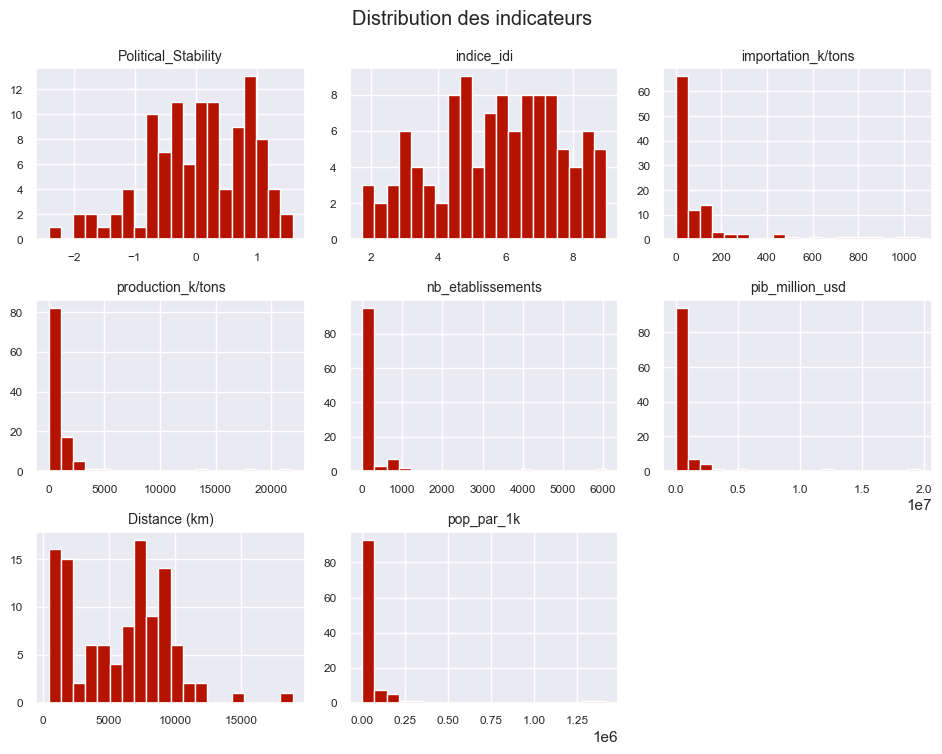

In [85]:
# Trace la distribution des indicateurs pour chaque variable

indicateurs = ['Political_Stability', 'indice_idi', 'importation_k/tons', 'production_k/tons', 'nb_etablissements', 'pib_million_usd', 'Distance (km)', 'pop_par_1k']
color_rgb = (181/255, 18/255, 0/255)

fig, axs = plt.subplots(3, 3, figsize=(9.6, 7.68))

for i, indicateur in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].hist(dfdrop[indicateur].dropna(), color=color_rgb, bins=20)
    axs[r, c].set_title(indicateur, size=10)
    axs[r, c].tick_params(axis='both', which='both', labelsize=8.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Distribution des indicateurs')

plt.tight_layout()

plt.show()

del fig, axs, i, r, c

In [86]:
# Détection des ouliers
def detect_outliers(dfdrop):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_col = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_col])
    return outliers.drop_duplicates()

outliers_df = detect_outliers(dfdrop)
outliers_df.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
267,Yémen,-2.94,NaN,78.0,168.0,NaN,1.839165e+04,"5464,36",27834.819
1,Afrique du Sud,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,"9063,96",57009.756
4,Allemagne,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,"632,77",82658.409
7,Angola,-0.33,1.94,277.0,42.0,9.0,1.221239e+05,"6849,73",29816.766
11,Arabie saoudite,-0.58,6.67,722.0,616.0,220.0,7.149947e+05,"4634,58",33101.179


In [87]:
def display_outliers_tab(indicateur, position=['upper', 'lower']):
    """
    Affiche les pays outliers pour un indicateur donné de dfdrop.
    Paramètres :
    - indicateur : le nom de l'indicateur à afficher.
    - position : la position des outlier à afficher.
    """

    # Calcul les bornes max/min
    Q1 = dfdrop[indicateur].quantile(0.25)
    Q3 = dfdrop[indicateur].quantile(0.75)
    IQR = Q3 - Q1
    max_boxplot = 1.5 * IQR + Q3
    min_boxplot = Q1 - 1.5 * IQR

    # Filtre les outliers
    if position == 'upper':
        return dfdrop.loc[
            dfdrop[indicateur] >= max_boxplot, ['pays', indicateur]
        ].sort_values(by=indicateur, ascending=False)
    elif position == 'lower':
        return dfdrop.loc[
            dfdrop[indicateur] <= min_boxplot, ['pays', indicateur]
        ].sort_values(by=indicateur)

In [99]:
display_outliers_tab('Political_Stability', 'upper') #outliers pour Political_Stability

,pays,Political_Stability


In [89]:
display_outliers_tab('indice_idi', 'upper') #affiche les outliers pour l'indice idi

,pays,indice_idi


In [90]:
display_outliers_tab('importation_k/tons', 'upper') #outliers pour importation_k/tons

,pays,importation_k/tons
119,Japon,1069.0
151,Mexique,972.0
52,"Hong Kong, Chine",907.0
4,Allemagne,842.0
191,Royaume-Uni de Grande-Bretagne et d'Irlande du...,779.0
11,Arabie saoudite,722.0
180,Pays-Bas (Royaume des),608.0
1,Afrique du Sud,514.0
51,"Chine, continentale",452.0
272,Émirats arabes unis,433.0


In [91]:
display_outliers_tab('production_k/tons', 'upper') #outliers pour production_k/tons

,pays,production_k/tons
270,États-Unis,21914.0
51,"Chine, continentale",18236.0
37,Brésil,14201.0
83,Fédération de Russie,4444.0
107,Inde,3545.0
151,Mexique,3249.0
183,Pologne,2351.0
108,Indonésie,2301.0


In [92]:
display_outliers_tab('nb_etablissements', 'upper') #outliers pour nb_etablissements

,pays,nb_etablissements
51,"Chine, continentale",6078.0
270,États-Unis,4062.0
119,Japon,1131.0
1,Afrique du Sud,914.0
191,Royaume-Uni de Grande-Bretagne et d'Irlande du...,909.0
83,Fédération de Russie,772.0
141,Malaisie,718.0
246,Thaïlande,717.0
108,Indonésie,689.0
16,Australie,653.0


In [93]:
display_outliers_tab('pib_million_usd', 'upper') #outliers pour pib_million_usd

,pays,pib_million_usd
270,États-Unis,1.961210e+07
51,"Chine, continentale",1.231049e+07
119,Japon,4.930837e+06
4,Allemagne,3.690849e+06
191,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2.680148e+06
107,Inde,2.624329e+06
37,Brésil,2.063515e+06
117,Italie,1.961796e+06
47,Canada,1.649519e+06
65,République de Corée,1.623901e+06


In [94]:
display_outliers_tab('Distance (km)', 'upper')	 #outliers pour Distance (km)

,pays,Distance (km)
169,Nouvelle-Zélande,18908.95


In [95]:
display_outliers_tab('pop_par_1k', 'upper') #outliers pour pop_par_1k

,pays,pop_par_1k
51,"Chine, continentale",1421021.791
107,Inde,1338676.785
270,États-Unis,325084.756
108,Indonésie,264650.963
174,Pakistan,207906.209
37,Brésil,207833.823
164,Nigéria,190873.244
22,Bangladesh,159685.424
83,Fédération de Russie,145530.082
119,Japon,127502.725


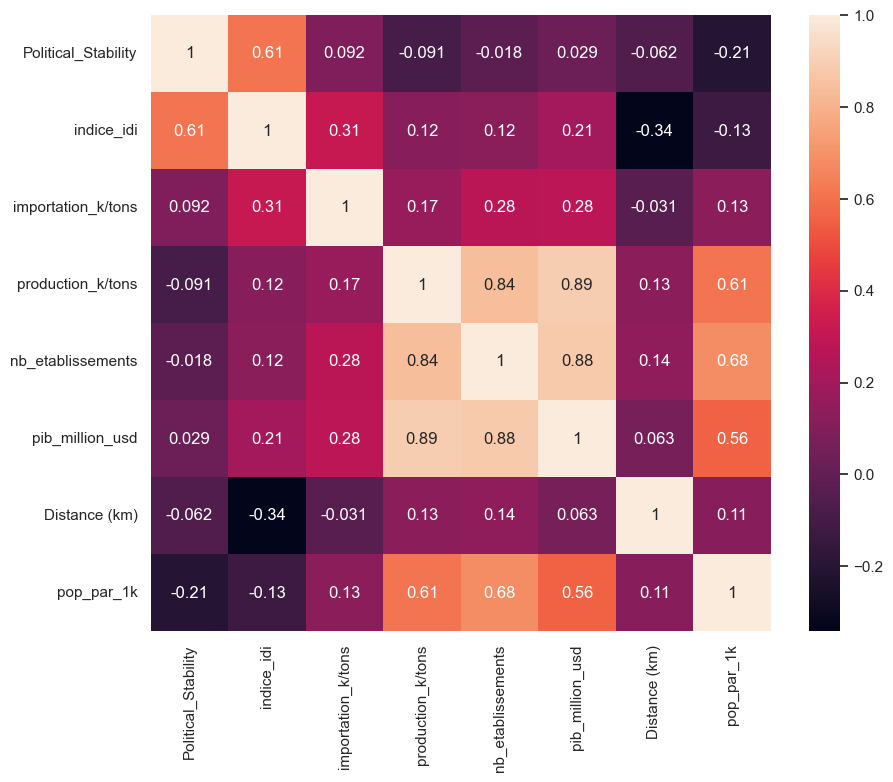

In [100]:
# selection des colonnes numériques
numeric_cols = dfdrop.select_dtypes(include=['float64', 'int64']).columns
corrMatrix = dfdrop[numeric_cols].corr()

# Heatmap decorrelation entre les variables
sns.set(rc={'figure.figsize': (10, 8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [97]:

corrMatrix.style.format('{:.2f}') #meme chose que la cellule précédente mais avec un format différent

,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
Political_Stability,1.00,0.57,0.13,-0.04,-0.02,0.06,0.08,-0.14
indice_idi,0.57,1.00,0.33,0.16,0.11,0.22,-0.32,-0.03
importation_k/tons,0.13,0.33,1.00,0.19,0.27,0.31,-0.06,0.15
production_k/tons,-0.04,0.16,0.19,1.00,0.84,0.89,0.08,0.62
nb_etablissements,-0.02,0.11,0.27,0.84,1.00,0.88,0.13,0.69
pib_million_usd,0.06,0.22,0.31,0.89,0.88,1.00,0.02,0.57
Distance (km),0.08,-0.32,-0.06,0.08,0.13,0.02,1.00,0.06
pop_par_1k,-0.14,-0.03,0.15,0.62,0.69,0.57,0.06,1.00


In [101]:
dfdrop.describe().T.style.format('{:.2f}') #statistiques descriptives

,count,mean,std,min,25%,50%,75%,max
Political_Stability,109.00,0.07,0.83,-2.41,-0.50,0.13,0.78,1.59
indice_idi,109.00,5.75,1.87,1.74,4.51,5.98,7.19,8.98
importation_k/tons,109.00,114.75,216.16,0.00,7.00,25.00,116.00,1069.00
production_k/tons,109.00,1028.62,3051.99,0.00,35.00,136.00,918.00,21914.00
nb_etablissements,109.00,202.53,718.05,1.00,6.00,21.00,83.00,6078.00
pib_million_usd,109.00,679293.17,2288894.97,520.70,23136.25,82035.79,341271.10,19612100.00
Distance (km),109.00,5841.02,3641.24,424.91,1945.82,6820.13,8588.61,18908.95
pop_par_1k,109.00,59021.79,190083.07,52.05,4056.10,10569.45,37953.18,1421021.79
